In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Trees.Tree import TreeClassifier
from metrics import mse, accuracy
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
dataset = sns.load_dataset("penguins")
dataset = dataset.drop([3, 339], axis=0)
dataset.sex = dataset.sex.fillna('Na')

In [3]:
train, test = train_test_split(dataset, train_size=0.6, shuffle=True, random_state=42)
model = TreeClassifier(metric=accuracy, criterion='entropy', max_depth=7, debug=False, cat_features=['island', 'sex'])
model.fit(train, target='species')
pred_df = model.predict(test, predict_col='pred')

In [4]:
accuracy(pred_df['pred'], pred_df['species'])

0.9635036496350365

In [5]:
from sklearn import datasets
blobs = datasets.make_blobs(n_samples=1234, random_state=42, centers=5, cluster_std=2)

In [6]:
df_train = pd.DataFrame(blobs[0], columns=['x1', 'x2'])
df_train['target'] = blobs[1]

df_test = pd.DataFrame()
df_test['x1'] = np.random.uniform(-10, 10, 1000)
df_test['x2'] = np.random.uniform(-10, 10, 1000)

<AxesSubplot:xlabel='x1', ylabel='x2'>

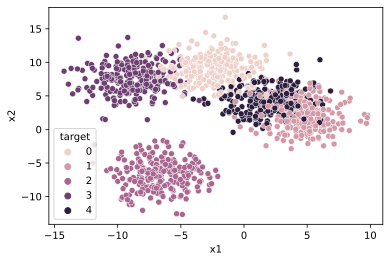

In [7]:
sns.scatterplot(data=df_train, x='x1', y='x2', hue='target')

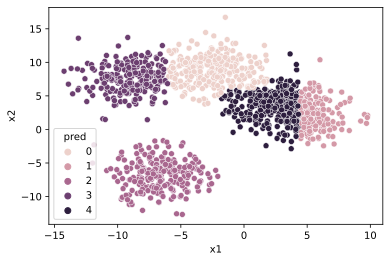

In [8]:
model = TreeClassifier(metric=accuracy, criterion='entropy', max_depth=3, debug=False)
model.fit(df_train, target='target')
model.predict(df_train, predict_col='pred')
ax = sns.scatterplot(data=df_train, x='x1', y='x2', hue='pred')
# ax.set(xlim = (-12, 7), ylim=(-10, 10))
plt.show()

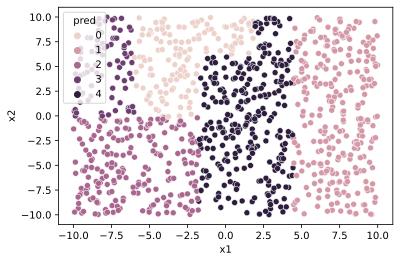

In [9]:
model.predict(df_test, predict_col='pred')
ax = sns.scatterplot(data=df_test, x='x1', y='x2', hue='pred')


In [10]:
from Trees.RandomForest import RandomForestClassifier
cat_features = ['island', 'sex']
dataset = sns.load_dataset("penguins")
dataset = dataset.drop([3, 339], axis=0)
dataset.sex = dataset.sex.fillna('Na')
train, test = train_test_split(dataset, train_size=0.6, shuffle=True, random_state=42)
train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
97,Adelie,Dream,40.3,18.5,196.0,4350.0,Male
262,Gentoo,Biscoe,45.3,13.7,210.0,4300.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
182,Chinstrap,Dream,40.9,16.6,187.0,3200.0,Female
69,Adelie,Torgersen,41.8,19.4,198.0,4450.0,Male
...,...,...,...,...,...,...,...
189,Chinstrap,Dream,52.0,20.7,210.0,4800.0,Male
72,Adelie,Torgersen,39.6,17.2,196.0,3550.0,Female
107,Adelie,Biscoe,38.2,20.0,190.0,3900.0,Male
271,Gentoo,Biscoe,48.5,14.1,220.0,5300.0,Male


In [11]:

model = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=4, cat_features=cat_features,
                     max_features=5, random_state=42, n_jobs=-1, subsample=0.6, debug=False)
model.fit(train, 'species')

In [12]:
pred = model.predict(test)

In [13]:
accuracy(pred, test['species'])

0.9708029197080292